# Support Vector Machines (SVMs)
By Carl Shan

For more information about Support Vector Machines, you can see the [course notes](https://jennselby.github.io/MachineLearningCourseNotes/).

# Introduction

This Jupyter Notebook will have you look at the Iris dataset.

The Iris flower dataset is so famous it has its own [Wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset contains 150 records with 5 different attributes.

The dataset contains 50 samples from three different species of the *Iris* flowers: *setosa*, *virginica* and *versicolor*).

![Iris Flowers](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

You will be building a support vector machine classification algorithm to predict which species a flower is, given that you know the 5 attributes of the folor.

In [1]:
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn
from sklearn import svm, datasets # for fitting our model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# these are all needed for the particular visualization we're doing
from sklearn.externals.six import StringIO
import pydot
import os.path


# to display graphs in this notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [2]:
iris = load_iris()

## Converting it to a DataFrame

You can also try looking at it using a [pandas dataframe](https://jennselby.github.io/MachineLearningCourseNotes/#pandas).

In [3]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotting the Iris Data

Let's visualize our dataset, so that we can better understand what it looks like.

Change the first two variables to change which features you are looking at.

Let's also break up the data into the three separate classes just for plotting.

In [5]:
class_1 = iris_df[iris_df['target'] == 'setosa']
class_2 = iris_df[iris_df['target'] == 'virginica']
class_3 = iris_df[iris_df['target'] == 'versicolor']

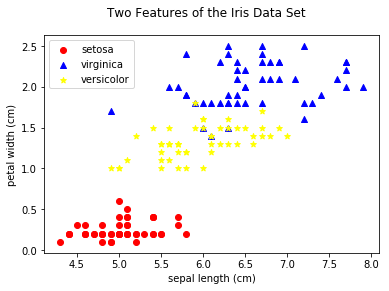

In [6]:
# create a figure and label it
fig = plt.figure()
fig.suptitle('Two Features of the Iris Data Set')

x_axis = 'sepal length (cm)'
y_axis = 'petal width (cm)'

plt.xlabel(x_axis)
plt.ylabel(y_axis)

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = plt.scatter(class_1[x_axis], class_1[y_axis],
                            c="red", marker="o", label='setosa')
scatter_1 = plt.scatter(class_2[x_axis], class_2[y_axis],
                            c="blue", marker="^", label='virginica')
scatter_2 = plt.scatter(class_3[x_axis], class_3[y_axis],
                            c="yellow", marker="*", label='versicolor')

# add a legend to explain which points are which
plt.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
plt.show()

## Training a Support Vector Machine



In [7]:
## Take a look at this.

iris_df['target'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

Support vector machines only take numberic labels (e.g., 0, 1) as outputs. Currently our target column are strings.


## Converting from strings to numbers

So we're going to map the strings to numbers.

Here's a quick way to do that below.

In [8]:
def convert_to_numeric(species):
    if species == 'setosa':
        return 0.0
    elif species == 'versicolor':
        return 1.0
    elif species == 'virginica':
        return 2.0

In [9]:
iris_df['numeric_target'] = iris_df['target'].apply(convert_to_numeric)

Next, we want to fit our support vector machine model to the iris data we're using.

In [10]:
training_cols = [
                 'sepal length (cm)', 
                 'sepal width (cm)', 
                 'petal length (cm)',
                 'petal width (cm)'
                ]

testing_col = ['numeric_target']

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,numeric_target
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


In [12]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
numeric_target       float64
dtype: object

In [13]:
# Train the model on all of the data
# Look how easy it is!



model = svm.SVC()

model.fit(iris_df[training_cols].values, iris_df[testing_col].values)

/Users/nikpate/miniconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikpate/miniconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Cool. Now you've built a Support Vector Machine classification model. Great work!

Let's figure out how well this model fit the data now.

## Advanced Option

First, look over the [SVM documentation](http://scikit-learn.org/stable/modules/svm.html) and [plotting example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).

Then answer the following questions:

1. Do the other pairs of features in the iris dataset give similar results in terms of separating out the classes?
2. Are there other kernels that appear to do a better job?
3. If you use the entire dataset, how might you start to get an idea of what it finds? What do the `support_vectors_` and support fields of the model object tell you?

In [14]:
#import student dataset
student_data_full = pandas.read_csv('/Users/nikpate/Documents/Programming/MachineLearningClass20182019/Fall/student-por.csv')
student_data_full

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,1,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,1,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,0,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,0,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,1,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,0,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,0,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [15]:
training_cols = ['sex','age', 'Medu', 'Fedu','traveltime', 'studytime','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

testing_col = ['failures']

In [16]:
def assign_samples(data,sections):
    #Take data and randomly assign them groups 1-10
    
    points_per_section = int(data.shape[0]/sections)
    
    sampled_data = pandas.DataFrame(columns=data.columns)
    
    for i in range(10):

        current_sample = data.sample(n=points_per_section)
        data = data.drop(current_sample.index)
        current_sample['random_group'] = i+1
        sampled_data = pandas.concat([sampled_data,current_sample])
        
    return sampled_data.sort_index().reset_index(drop=True)

In [20]:
def x_fold_accuracy(sampled_data,sections,kernel_,training_cols,testing_col):
    
    accuracy_scores = []


    print(sampled_data[testing_col].dtypes)
    
    for i in range(sections):
        section = i+1
        training_data = sampled_data[sampled_data['random_group'] != section]
        print(training_data.shape[0])
        testing_data = sampled_data[sampled_data['random_group'] == section]
        print(training_data.columns)
        model2 = svm.SVC(kernel=kernel_)
        model2.fit(training_data[training_cols].values, training_data['failures'].values)
        predictions = models[i].predict(testing_data[training_cols].values)
        accuracy = accuracy_score(testing_data[testing_col],predictions,normalize=True)
        print(accuracy)
        accuracy_scores.append(accuracy)
    
    average_accuracy = sum(accuracy_scores)/len(accuracy_scores)
    print(average_accuracy)
    
    return average_accuracy

In [21]:
# split data into testing and training sets
student_data_sampled= assign_samples(student_data_full,10)

#Create a model for each kernel in the list of kernels
kernels = ('linear', 'poly', 'rbf', 'sigmoid')

kernel_accuracy = x_fold_accuracy(student_data_sampled,10,'linear',training_cols,testing_col)
print("The '" + 'linear' + "' kernel has an accuracy of: " + str(kernel_accuracy))
    
# find the accuracy of each model

### Conclusion: the polynomial kernal works the best, the linear kernel is a close second, and the sigmoid kernel has the lowest accuracy

failures    object
dtype: object
576
Index(['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus',
       'Walc', 'absences', 'activities', 'address', 'age', 'failures',
       'famrel', 'famsize', 'famsup', 'freetime', 'goout', 'guardian',
       'health', 'higher', 'internet', 'nursery', 'paid', 'random_group',
       'reason', 'romantic', 'school', 'schoolsup', 'sex', 'studytime',
       'traveltime'],
      dtype='object')


/Users/nikpate/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


ValueError: Unknown label type: 'unknown'